In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_2D_data(*, mean=(0,0), widths=(1,1), size=1_000_000):
    cov = np.asarray(widths) * np.eye(2)
    return np.random.multivariate_normal(mean, cov, size=size).T

def plothist2d(h):
    X, Y = h.axes.edges

    return plt.pcolormesh(X.T, Y.T, h.view().T)

plothist = lambda h: plt.bar(h.axes[0].centers, h, width=h.axes[0].widths)

# 4: Special histogram axes

## 4.1: Transforms

There are more axes types, and they all provide the same API in histograms, so they all just work without changes:

In [3]:
hist8 = bh.Histogram(
    bh.axis.Regular(30, 1,10, transform=bh.axis.transform.log),
    bh.axis.Regular(30, 1,10, transform=bh.axis.transform.sqrt)
)

In [4]:
hist8.reset()
hist8.fill(*make_2D_data(mean=(5,5), widths=(5,5)))

Histogram(
  Regular(30, 1, 10, transform=log),
  Regular(30, 1, 10, transform=sqrt),
  storage=Double()) # Sum: 903234.0 (1000000.0 with flow)

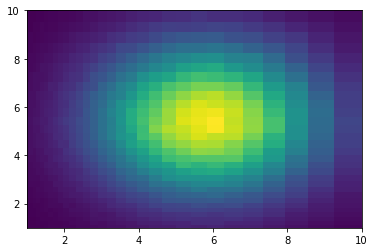

In [5]:
plothist2d(hist8);

## 4.2: And, circular, too!

In [6]:
hist9 = bh.Histogram(bh.axis.Regular(30, 0, 2*np.pi, circular=True))
hist9.fill(np.random.uniform(0, np.pi*4, size=300))

Histogram(Regular(30, 0, 6.28319, circular=True), storage=Double()) # Sum: 300.0

Now, the really complicated part, making a circular histogram:


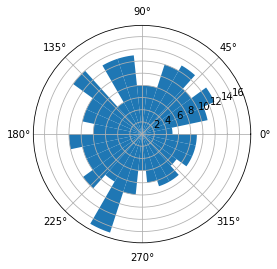

In [7]:
ax = plt.subplot(111, polar=True)
plothist(hist9);

Not bad, we just reused our plotting code for all 1D histograms!